In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sshikamaru/fruit-recognition")

/Users/markshteyn/projects/robotics/project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(path)

/Users/markshteyn/.cache/kagglehub/datasets/sshikamaru/fruit-recognition/versions/2


In [3]:
import numpy as np
import pandas as pd
import pathlib
import tensorflow as tf
import random
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten,Input
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_path = f"{path}/train/train"
test_path = f"{path}/test/test"

In [5]:
IMAGE_SIZE = 128
NUM_CLASSES = 33
BATCH_SIZE = 32

In [6]:
image_generator = ImageDataGenerator(
    rescale=1.0/255.0, 
    validation_split=0.2, 
    rotation_range=10, 
    horizontal_flip = True)

In [7]:
train_data = image_generator.flow_from_directory(
    train_path,
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'training'
)
validation_data = image_generator.flow_from_directory(
    train_path,
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


In [8]:
print(train_data.class_indices)

{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


In [9]:
model = Sequential([
    Input(shape = (IMAGE_SIZE,IMAGE_SIZE,3)),
    Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2,2)),
    
    Conv2D(64, (3,3), padding = 'same', activation='relu'),
    MaxPool2D(pool_size = (2,2)),
    
    Conv2D(128, (3,3), padding = 'same', activation='relu'),
    MaxPool2D(pool_size = (2,2)),

    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(NUM_CLASSES, activation = 'softmax')
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 33)             │        16,929 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,887,905 (64.42 MB)

 Trainable params: 16,887,905 (64.42 MB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
# Use GPU
with tf.device('/device:GPU:0'):
    history = model.fit(train_data, validation_data = validation_data, epochs = 2)

Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 229s 542ms/step - accuracy: 0.7619 - loss: 0.8509 - val_accuracy: 0.9827 - val_loss: 0.0551
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 219s 519ms/step - accuracy: 0.9875 - loss: 0.0481 - val_accuracy: 0.9935 - val_loss: 0.0227


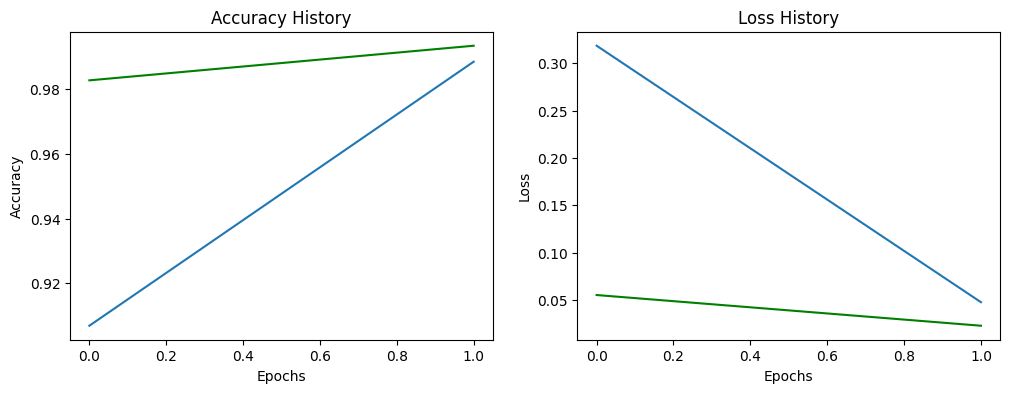

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Accuracy History')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color = 'green')

plt.subplot(1,2,2)
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], color = 'green')
plt.show()

In [13]:
import os

test_data=[]
for file in os.listdir(test_path):
    if file.endswith('.jpg'):
        img_path = os.path.join(test_path, file)
        img = Image.open(img_path)
        img = img.resize((128, 128))
        img_array = np.array(img)/255.0
        test_data.append(img_array)
test_images = np.array(test_data)

In [14]:
model.evaluate(validation_data)

106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.9949 - loss: 0.0171


[0.01922004483640194, 0.9946444630622864]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


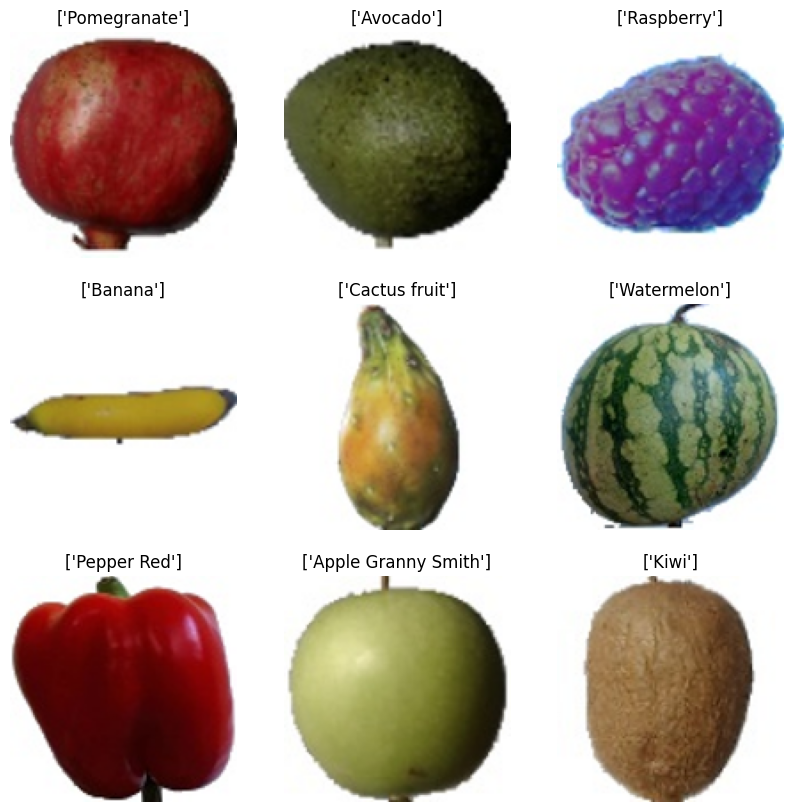

In [15]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    t=random.randint(1,test_images.shape[0]-1)
    EachImage = np.expand_dims(test_images[t], axis=0)
    prediction = model.predict(EachImage)
    predicted_label = [key for key,value in train_data.class_indices.items() if value == np.argmax(prediction, axis=1)[0]]
    
    plt.title(predicted_label)
    plt.imshow(test_images[t])
    plt.axis('off')

In [17]:
# Save the model 
model.save("model.keras")

In [20]:
# Test it on a new image
image_path = "../fruit_5.png"
img = Image.open(image_path)
img = img.resize((128, 128))
img_array = np.array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)
print(prediction)
predicted_label = [key for key,value in train_data.class_indices.items() if value == np.argmax(prediction, axis=1)[0]]
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[4.0398110e-15 2.0348640e-13 1.9248111e-13 5.5660003e-18 3.0100000e-07
  2.5027778e-20 3.4266132e-12 1.3347511e-09 2.2393555e-19 5.6973236e-13
  9.9999964e-01 1.5307059e-12 1.2306546e-22 1.5102152e-11 2.9126142e-12
  8.2117578e-16 8.4254062e-23 7.2863777e-09 2.1749525e-13 2.6625260e-13
  9.3488496e-20 4.1060439e-15 1.8021167e-08 1.8152512e-18 8.6715082e-20
  2.1654316e-17 5.7010702e-22 5.2360639e-16 2.7860356e-15 5.0123345e-19
  1.4259727e-15 1.4014648e-12 3.1106170e-14]]
['Corn']


In [19]:
# Export and save train_data.class_indices.items()  
import json
with open('class_indices.json', 'w') as f:
    json.dump(train_data.class_indices, f)
    